In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [3]:
def ACF(data,lags):
    # convert input data into a numpy array
    data = np.array(data)
    # acf will store the autocorreltion coefficent at each lag interval
    # the first datapoint is always 1.0 since anything correlated with itsself is = 1
    acf = [1.0]
    # calculate the mean for the entire dataset
    y_bar = data.mean()
    print("The mean of this dataset is: ",y_bar)
    # subtract the mean from each observation
    yy_bar = data - y_bar
    # clacualte the total variance for the data set
    total_variance = sum(np.square(yy_bar))
    print("The total variance for this dataset is: ", total_variance)
    # perform a forloop over the dataset with the desired number of lags
    # range is 1,lags b/c the first iteration calcualtes T1
    for i in range(1,lags):
        # first nparray is removing the last element each iteration
        yy_bar_bottom = yy_bar[:-i]
        # second nparray removes the first element each interation
        yy_bar_top = yy_bar[i:]
        # take the sum of of the product of each nparray each iteration
        yy = sum(yy_bar_top * yy_bar_bottom)
        # divide the sum by total variance and append to resulting acf list
        acf.append(yy/total_variance)
    return acf

In [4]:
# np.random.seed(42) fix 

In [5]:
def acf_plot(y):
    #y = y.tolist()
    y_rev = y[::-1]
    y_rev.extend(y[1:])
    print(len(y_rev))
    return y_rev

In [6]:
def ADF_Cal(x):
    result = adfuller(x)
    print("ADF Statistic: %f" %result[0])
    print("p-value: %f" %result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print('\t%s: %3f' % (key,value))

In [7]:
def a_co(x,y):
    #print("XT shape:",x.T.shape)
    #print("X shape:",x.shape)
    x_xt = np.mat(x.T) * np.mat(x)
    #print("\nXT * X :\n",x_xt)
    #print("\nXT * X shape:",x_xt.shape)
    det_x_xt = np.linalg.det(x_xt)
    #print("\nDeterminent:\n",det_x_xt)
    x_xtt = np.linalg.inv(x_xt)
    #print("\nInverse XT * X:\n",x_xtt)
    #print("\nShape Inverse XT: \n", x_xtt.shape)
    xt_x_xt = np.mat(x_xtt) * np.mat(x.T)
    #print("\nInverse XT * XT:\n", xt_x_xt)
    a = np.mat(xt_x_xt) * np.mat(y)
    print("\na1 and a2: \n",a)
    #B0 = float(B[0])
    #B1 = float(B[1])
    #print('The intercept for this linear regression model is: ', B0)
    #print('The slope for this linear regression model is: ', B1)
    #return B0,B1
    return a

In [8]:
# 1
# example of AR(1)
# y(t) + .5y(t-1) = e(t)

# Example of AR(2)
# y(t) - 0.5y(t-1) -0.2y(t-2) = e(t)

In [9]:
# 1.a simulate 1000 samples of AR(2)
n = 1000
mean = 0
std = 1
np.random.seed(42)
e = std * np.random.randn(n) + mean

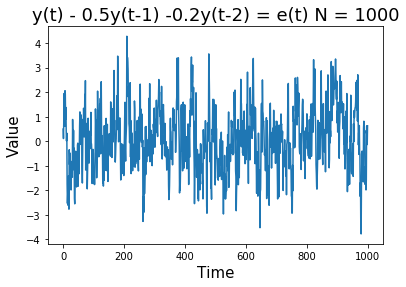

In [10]:
# 1a.
# 1.b plot y(t)
# np.zeros? is that because we assume all initial conditions = 0?
y = np.zeros(len(e))
for i in range(len(e)):
    if i == 0:
        y[i] = e[i]
    elif i == 1:
        y[i] = 0.5 * y[i-1] + e[i]
    else:
        y[i] = 0.5 * y[i - 1] + 0.2 * y[i - 2] + e[i]
plt.figure()
plt.plot(y)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.title('y(t) - 0.5y(t-1) -0.2y(t-2) = e(t) N = 1000',fontsize=18)

plt.show()

In [11]:
# 1.c Plot the ACF of y(t) for the first 20 lags
y_acf = ACF(y,20)
y_acf_plt = acf_plot(y_acf)

The mean of this dataset is:  0.0630590578631385
The total variance for this dataset is:  1619.2210508100484
39


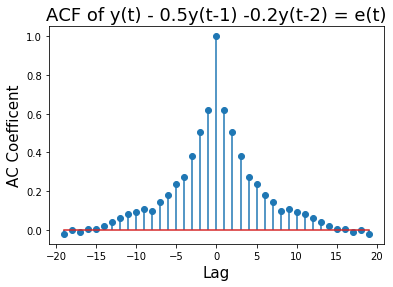

In [12]:
x = np.array(list(range(-19,20)))
figure = plt.stem(x,y_acf_plt,use_line_collection=True)
#plt.figure(figsize=(20,20))
plt.xlabel('Lag', fontsize=15)
plt.ylabel('AC Coefficent', fontsize=15)
plt.title('ACF of y(t) - 0.5y(t-1) -0.2y(t-2) = e(t)',fontsize=18)
plt.show()

In [16]:
# 1.d Display top 5 values of y(t)
print("First valeus of y(t):",y[0:5])

First valeus of y(t): [0.49671415 0.11009278 0.80207776 1.94608729 0.89930582]


In [18]:
# 1.e Apply ADF test to y 
adf_y = ADF_Cal(y)

ADF Statistic: -11.218917
p-value: 0.000000
Critical Values:
	1%: -3.436919
	5%: -2.864440
	10%: -2.568314


In [19]:
# Given the ADF test, y is defenitly stationary becaue of the low p-value

In [20]:
# 2 Repeat
# scipy process
num = [1,0,0]
den = [1,-0.5,-0.2]
system = (num,den,1)
y_new = signal.dlsim(system,e)

In [28]:
print("First values of y(t) using dslim:",y_new[1][0:5])

First values of y(t) using dslim: [[0.49671415]
 [0.11009278]
 [0.80207776]
 [1.94608729]
 [0.89930582]]


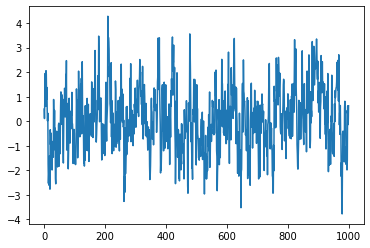

In [29]:
plt.plot(y_new[1])

In [30]:
# 3
# Rewrite question 1 as a multiple regression model using LSE

In [31]:
y[0:5]

array([0.49671415, 0.11009278, 0.80207776, 1.94608729, 0.89930582])

In [32]:
def AR_LSE(N,na,c):
    mean = 0
    std = 1
    np.random.seed(42)
    e = std * np.random.randn(N) + mean
    y = np.zeros(len(e))
    for i in range(len(e)):
        if i == 0:
            y[i] = e[i]
        elif i == 1:
            y[i] = 0.5 * y[i-1] + e[i]
        else:
            y[i] = 0.5 * y[i - 1] + 0.2 * y[i - 2] + e[i]
        
    x0 = np.zeros(len(e) - na)
    x1 = np.zeros(len(e) - na)
    y1 = np.zeros(len(e) - na)
    for i in range(len(e) - na):
        x0[i] = -y[na + i - 1]
        x1[i] = -y[na + i - 2]
        y1[i] = y[i + na]
    
    X = np.vstack([x0,x1])
    X = X.T
    y1 = np.vstack(y1)
    
    a = a_co(X,y1)
    if c == None:
        pass
    else:
        print("True Parameters: ",c)
    return a

In [35]:
test1 = AR_LSE(1000,2,None)


a1 and a2: 
 [[-0.49506429]
 [-0.20184547]]


In [36]:
test2 = AR_LSE(5000,2,None)


a1 and a2: 
 [[-0.48876427]
 [-0.20459609]]


In [37]:
test3 = AR_LSE(10000,2,None)


a1 and a2: 
 [[-0.48691626]
 [-0.19331823]]


In [40]:
# Question 4
def AR_gen():
    a = int(input("\nEnter the numbers of samples :"))
    b = int(input("\nEnter the order # of the AR process :"))
    c = np.array([(input("\nEnter corresponding parameters of AR process :"))])
    
    results = AR_LSE(a,b,c)
    
    return results

In [42]:
test_5000 = AR_gen()


Enter the numbers of samples :5000

Enter the order # of the AR process :2

Enter corresponding parameters of AR process :0.5,0.2

a1 and a2: 
 [[-0.48876427]
 [-0.20459609]]
True Parameters:  ['0.5,0.2']


In [43]:
test_10000 = AR_gen()


Enter the numbers of samples :10000

Enter the order # of the AR process :2

Enter corresponding parameters of AR process :0.5,02

a1 and a2: 
 [[-0.48691626]
 [-0.19331823]]
True Parameters:  ['0.5,02']


In [44]:
# Question 5

In [45]:
# Let consider an MA(2) process as 
# y(t)=e(t)+0.5e(t-1)+0.2e(t-2)


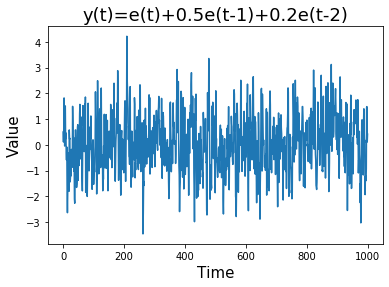

In [46]:
n_ma = 1000
mean = 0
std = 1
np.random.seed(42)
e_ma = std * np.random.randn(n_ma) + mean
y_ma = np.zeros(len(e_ma))
for i in range(len(e_ma)):
    if i == 0:
        y_ma[i] = e_ma[i]
    elif i == 1:
        y_ma[i] = e_ma[i] + 0.5 * e_ma[i-1]
    else:
        y_ma[i] = e_ma[i] + 0.5 * e_ma[i - 1] + 0.2 * e_ma[i - 2]
plt.figure()
plt.xlabel('Time', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.title('y(t)=e(t)+0.5e(t-1)+0.2e(t-2)',fontsize=18)
plt.plot(y_ma)

plt.show()

In [47]:
# 5.c Plot the ACF of y(t) for the first 20 lags
yma_acf = ACF(y_ma,20)
yma_acf_plt = acf_plot(yma_acf)

The mean of this dataset is:  0.032577922748960604
The total variance for this dataset is:  1226.9617702689436
39


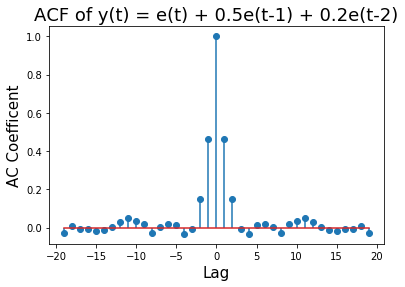

In [48]:
x = np.array(list(range(-19,20)))
figure = plt.stem(x,yma_acf_plt,use_line_collection=True)
#plt.figure(figsize=(20,20))
plt.xlabel('Lag', fontsize=15)
plt.ylabel('AC Coefficent', fontsize=15)
plt.title('ACF of y(t) = e(t) + 0.5e(t-1) + 0.2e(t-2)',fontsize=18)
plt.show()

In [49]:
y_ma[:5]

array([0.49671415, 0.11009278, 0.67789922, 1.81922127, 0.65689926])

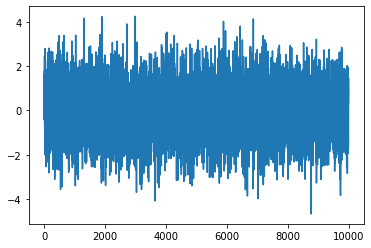

In [50]:
n_ma = 10000
mean = 0
std = 1
e_ma = std * np.random.randn(n_ma) + mean
y_ma = np.zeros(len(e_ma))
for i in range(len(e_ma)):
    if i == 0:
        y_ma[i] = e_ma[i]
    elif i == 1:
        y_ma[i] = e_ma[i] + 0.5 * e_ma[i-1]
    else:
        y_ma[i] = e_ma[i] + 0.5 * e_ma[i - 1] + 0.2 * e_ma[i - 2]
plt.figure()
plt.plot(y_ma)

plt.show()

In [51]:
# 5.c Plot the ACF of y(t) for the first 20 lags
yma_acf = ACF(y_ma,20)
yma_acf_plt = acf_plot(yma_acf)

The mean of this dataset is:  -0.013697955488882264
The total variance for this dataset is:  12726.915805673729
39


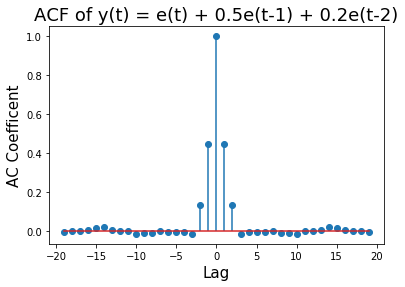

In [52]:
x = np.array(list(range(-19,20)))
figure = plt.stem(x,yma_acf_plt,use_line_collection=True)
#plt.figure(figsize=(20,20))
plt.xlabel('Lag', fontsize=15)
plt.ylabel('AC Coefficent', fontsize=15)
plt.title('ACF of y(t) = e(t) + 0.5e(t-1) + 0.2e(t-2)',fontsize=18)
plt.show()

In [53]:
y_ma[:5]

array([ 1.39935544,  1.6243114 ,  0.8018183 , -0.43219486,  0.386681  ])

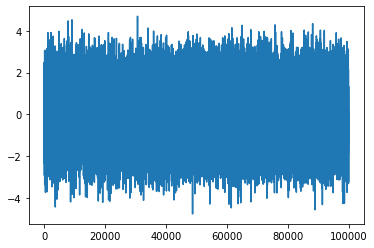

In [54]:
n_ma = 100000
mean = 0
std = 1
e_ma = std * np.random.randn(n_ma) + mean
y_ma = np.zeros(len(e_ma))
for i in range(len(e_ma)):
    if i == 0:
        y_ma[i] = e_ma[i]
    elif i == 1:
        y_ma[i] = e_ma[i] + 0.5 * e_ma[i-1]
    else:
        y_ma[i] = e_ma[i] + 0.5 * e_ma[i - 1] + 0.2 * e_ma[i - 2]
plt.figure()
plt.plot(y_ma)

plt.show()

In [55]:
# 5.c Plot the ACF of y(t) for the first 20 lags
yma_acf = ACF(y_ma,20)
yma_acf_plt = acf_plot(yma_acf)

The mean of this dataset is:  0.0043876793314573375
The total variance for this dataset is:  129618.48913535969
39


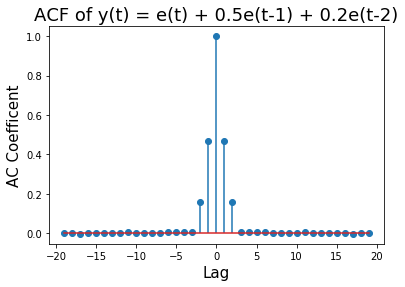

In [56]:
x = np.array(list(range(-19,20)))
figure = plt.stem(x,yma_acf_plt,use_line_collection=True)
#plt.figure(figsize=(20,20))
plt.xlabel('Lag', fontsize=15)
plt.ylabel('AC Coefficent', fontsize=15)
plt.title('ACF of y(t) = e(t) + 0.5e(t-1) + 0.2e(t-2)',fontsize=18)
plt.show()

In [60]:
print("First values of y(t):",y_ma[:5])

First values of y(t): [-1.17817969 -0.15623944  1.09154244  1.39713164  1.68422065]


In [61]:
# Perform and ADF test on y(t) with 100,000 samples
ADF_ma = ADF_Cal(y_ma)

ADF Statistic: -127.209612
p-value: 0.000000
Critical Values:
	1%: -3.430415
	5%: -2.861569
	10%: -2.566785


In [62]:
# 6-
# Using the “scipy” python package and “dlsim” command, simulate the MA(2) process in question 5. 

In [63]:
# 2 Repeat
# Using the “scipy” python package and “dlsim” command, simulate the MA(2) process in question 5. 
# scipy process
num = [1,.5,.2]
den = [1,0,0]
system = (num,den,1)
y_new = signal.dlsim(system,e_ma)

In [64]:
y_new[1][0:5]

array([[-1.17817969],
       [-0.15623944],
       [ 1.09154244],
       [ 1.39713164],
       [ 1.68422065]])

In [ ]:
# 1
# example of AR(1)
# y(t) + .5y(t-1) = e(t)

# 2 Repeat
# scipy process
num = [1,0,0]
den = [1,-0.5,-0.2]
system = (num,den,1)
y_new = signal.dlsim(system,e)

# Example of AR(2)
# y(t) - 0.5y(t-1) -0.2y(t-2) = e(t)

# 2 Repeat
# Using the “scipy” python package and “dlsim” command, simulate the MA(2) process in question 5. 
# scipy process
num = [1,.5,.2]
den = [1,0,0]
system = (num,den,1)
y_new = signal.dlsim(system,e_ma)